## Import & Setting

### [Zipline Document](https://zipline.ml4trading.io/index.html)  사이트

## Custom Data로 백테스트 [사이트](https://zipline-trader.readthedocs.io/en/latest/backtest.html)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from zipline import run_algorithm
from zipline.api import (attach_pipeline, pipeline_output,
                         date_rules, time_rules, record, order,
                         schedule_function, commission, slippage,
                         set_slippage, set_commission, set_max_leverage, set_long_only, 
                         set_benchmark,
                         get_open_orders, cancel_order,
                         order_target, order_target_percent, symbol,
                         symbols)
from zipline.data import bundles
from zipline.utils.calendars import get_calendar
from zipline.utils.run_algo import load_extensions

import pyfolio as pf

## 데이터 가져오기

### 데이터가 있는 장소를 환경 변수로 넘겨줘야 된다.

In [3]:
# 이 파일 경로는 컴퓨터마다 OS 마다 다르다.
os.environ['ZIPLINE_ROOT'] = 'C:/Users/PC/.zipline/'

In [4]:
load_extensions(default=True,
                extensions=[],
                strict=True,
                environ=None)

In [5]:
bundle_data = bundles.load('finance_datareader')

In [6]:
idx = pd.IndexSlice

In [7]:
def get_benchmark(start=None, end=None):
    kospi = (pd.read_hdf('../data/assets.h5', 'finance_datareader/kospi')
                .loc[start:end, :]['close']
            )
    kospi.index = kospi.index.tz_localize('UTC')
    return kospi.pct_change(periods=1).fillna(0)

In [8]:
def initialize(context):
    # 주식을 S-Oil로 설정
    context.equity = symbol("010950")
    context.set_long_only()
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))
#     context.set_max_leverage(1.0)


In [9]:
def handle_data(context, data):
    order_target(context.equity, 10)
    

In [10]:
def before_trading_start(context, data):
    pass


In [11]:
trading_calendar = get_calendar('XKRX')

start = pd.Timestamp('2019-01-01', tz='utc')
end = pd.Timestamp('2020-01-01', tz='utc')

performance = run_algorithm(start=start,
                  end=end,
                  initialize=initialize,
                  capital_base=100000,
                  handle_data=handle_data,
                  benchmark_returns=get_benchmark(start=start.date().isoformat(),
                                                  end=end.date().isoformat()),
                  bundle='finance_datareader',
                  trading_calendar=trading_calendar,
                  before_trading_start=before_trading_start,
                  data_frequency='daily'
                  )


In [12]:
performance

,period_open,period_close,starting_cash,ending_cash,portfolio_value,returns,longs_count,shorts_count,long_value,short_value,...,period_label,algorithm_period_return,algo_volatility,benchmark_period_return,benchmark_volatility,alpha,beta,sharpe,sortino,max_drawdown
2019-01-02 06:30:00+00:00,2019-01-02 00:01:00+00:00,2019-01-02 06:30:00+00:00,100000.0,100000.0,100000.0,0.000000,0,0,0.0,0.0,...,2019-01,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
2019-01-03 06:30:00+00:00,2019-01-03 00:01:00+00:00,2019-01-03 06:30:00+00:00,100000.0,-810455.1,99544.9,-0.004551,1,0,910000.0,0.0,...,2019-01,-0.004551,0.051085,-0.008109,0.091028,0.000000e+00,0.561197,-11.224972,-11.224972,-0.004551
2019-01-04 06:30:00+00:00,2019-01-04 00:01:00+00:00,2019-01-04 06:30:00+00:00,-810455.1,-810455.1,115544.9,0.160731,1,0,926000.0,0.0,...,2019-01,0.155449,1.494420,0.000124,0.130258,3.069105e+05,10.108287,8.778762,314.528197,-0.004551
2019-01-07 06:30:00+00:00,2019-01-07 00:01:00+00:00,2019-01-07 06:30:00+00:00,-810455.1,-810455.1,152544.9,0.320222,1,0,963000.0,0.0,...,2019-01,0.525449,2.453413,0.013483,0.149811,1.567484e+07,15.100691,12.233305,830.878099,-0.004551
2019-01-08 06:30:00+00:00,2019-01-08 00:01:00+00:00,2019-01-08 06:30:00+00:00,-810455.1,-810455.1,124544.9,-0.183553,1,0,935000.0,0.0,...,2019-01,0.245449,3.021756,0.007597,0.145234,1.564109e+03,18.699501,4.884454,11.323128,-0.183553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 06:30:00+00:00,2019-12-23 00:01:00+00:00,2019-12-23 06:30:00+00:00,-810455.1,-810455.1,167544.9,0.037141,1,0,978000.0,0.0,...,2019-12,0.675449,12.612975,0.096373,0.125302,1.100316e+05,15.413691,1.068578,2.404328,-1.026669
2019-12-24 06:30:00+00:00,2019-12-24 00:01:00+00:00,2019-12-24 06:30:00+00:00,-810455.1,-810455.1,161544.9,-0.035811,1,0,972000.0,0.0,...,2019-12,0.615449,12.587217,0.089592,0.125223,1.114446e+05,15.408291,1.063408,2.392686,-1.026669
2019-12-26 06:30:00+00:00,2019-12-26 00:01:00+00:00,2019-12-26 06:30:00+00:00,-810455.1,-810455.1,141544.9,-0.123805,1,0,952000.0,0.0,...,2019-12,0.415449,12.562577,0.093498,0.125007,8.955822e+04,15.360443,1.050948,2.364275,-1.026669
2019-12-27 06:30:00+00:00,2019-12-27 00:01:00+00:00,2019-12-27 06:30:00+00:00,-810455.1,-810455.1,150544.9,0.063584,1,0,961000.0,0.0,...,2019-12,0.505449,12.536813,0.096622,0.124776,8.728419e+04,15.356122,1.054026,2.371180,-1.026669


<AxesSubplot:>

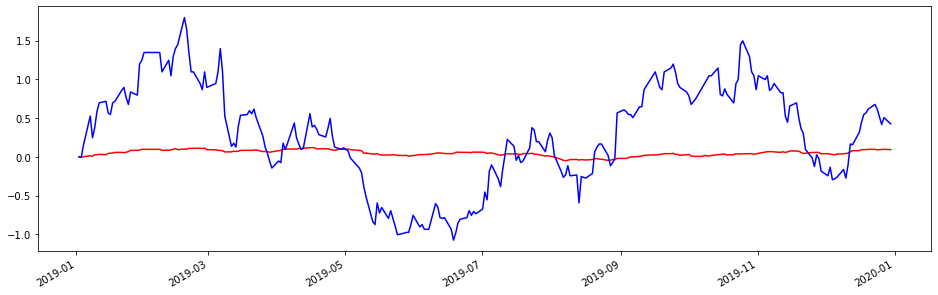

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(16, 5), sharex=True)
performance.benchmark_period_return.plot(color='red')
performance.algorithm_period_return.plot(color='blue')

## BackTest에 Hello World인 SMA(Simple Moving Average) 전략 테스트

In [19]:
def initialize(context):
    context.i = 0 
    context.asset = symbol('000660')
    set_benchmark(symbol('000660'))
    context.set_commission(commission.PerShare(cost=.01, min_trade_cost=0))

In [20]:
def handle_data(context, data):
    # 처음 200일은 Skip
    context.i += 1
    if context.i < 200:
        return
    # 평균을 계산
    # 10일 이동 평균과 30일 이동평균을 사용한다.
    short_mavg = data.history(context.asset, 'price', bar_count=10, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=30, frequency="1d").mean()
    
    
    # 거래 조건
    open_orders = get_open_orders()
    if context.asset not in open_orders:
        if short_mavg > long_mavg:
            order_target(context.asset, 1.0)
        elif short_mavg < long_mavg:
            order_target(context.asset, 0.0)
             

    record(stock=data.current(context.asset, 'price'),
            short_mavg=short_mavg,
            long_mavg=long_mavg)

In [21]:
start = pd.Timestamp('2010-01-01', tz='utc')
end = pd.Timestamp('2020-01-01', tz='utc')


perf = run_algorithm(start=start,
                    end=end,
                    initialize=initialize,
                    capital_base=10000,
                    handle_data=handle_data,
                    bundle='finance_datareader',
                    trading_calendar=trading_calendar,
                    data_frequency='daily'
                                )

<AxesSubplot:>

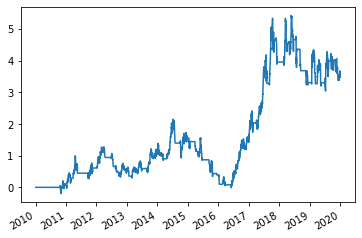

In [22]:
perf.algorithm_period_return.plot()

## Pyfolio를 이용해서 분석하기

In [23]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [24]:
benchmark_period_returns = perf['benchmark_period_return']

In [25]:
daily_benchmark_returns = np.exp(np.log(benchmark_period_returns + 1.0).diff()) - 1 

Start date,2010-01-04
End date,2019-12-30
Total months,117
,Backtest
Annual return,16.567%
Cumulative returns,348.22%
Annual volatility,43.591%
Sharpe ratio,0.57
Calmar ratio,0.24
Stability,0.71
Max drawdown,-68.621%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,68.62,2014-07-08,2016-06-03,2017-01-26,668
1,43.32,2012-03-28,2013-03-04,2014-01-08,466
2,37.11,2018-05-23,2019-07-08,NaT,NaN
3,36.00,2011-04-21,2011-09-26,2012-02-15,215
4,23.72,2010-10-25,2010-11-03,2010-11-22,21


Stress Events,mean,min,max
US downgrade/European Debt Crisis,0.00%,0.00%,0.00%
Fukushima,1.29%,-4.69%,9.16%
EZB IR Event,-0.28%,-4.15%,4.83%
Flash Crash,0.00%,0.00%,0.00%
Apr14,0.18%,-3.98%,4.90%
Oct14,0.35%,-9.73%,8.31%
Fall2015,-0.75%,-5.62%,3.34%
Recovery,0.09%,-11.70%,15.66%
New Normal,0.10%,-12.22%,11.11%


Top 10 long positions of all time,max
sid,
000660,279.24%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
000660,279.24%


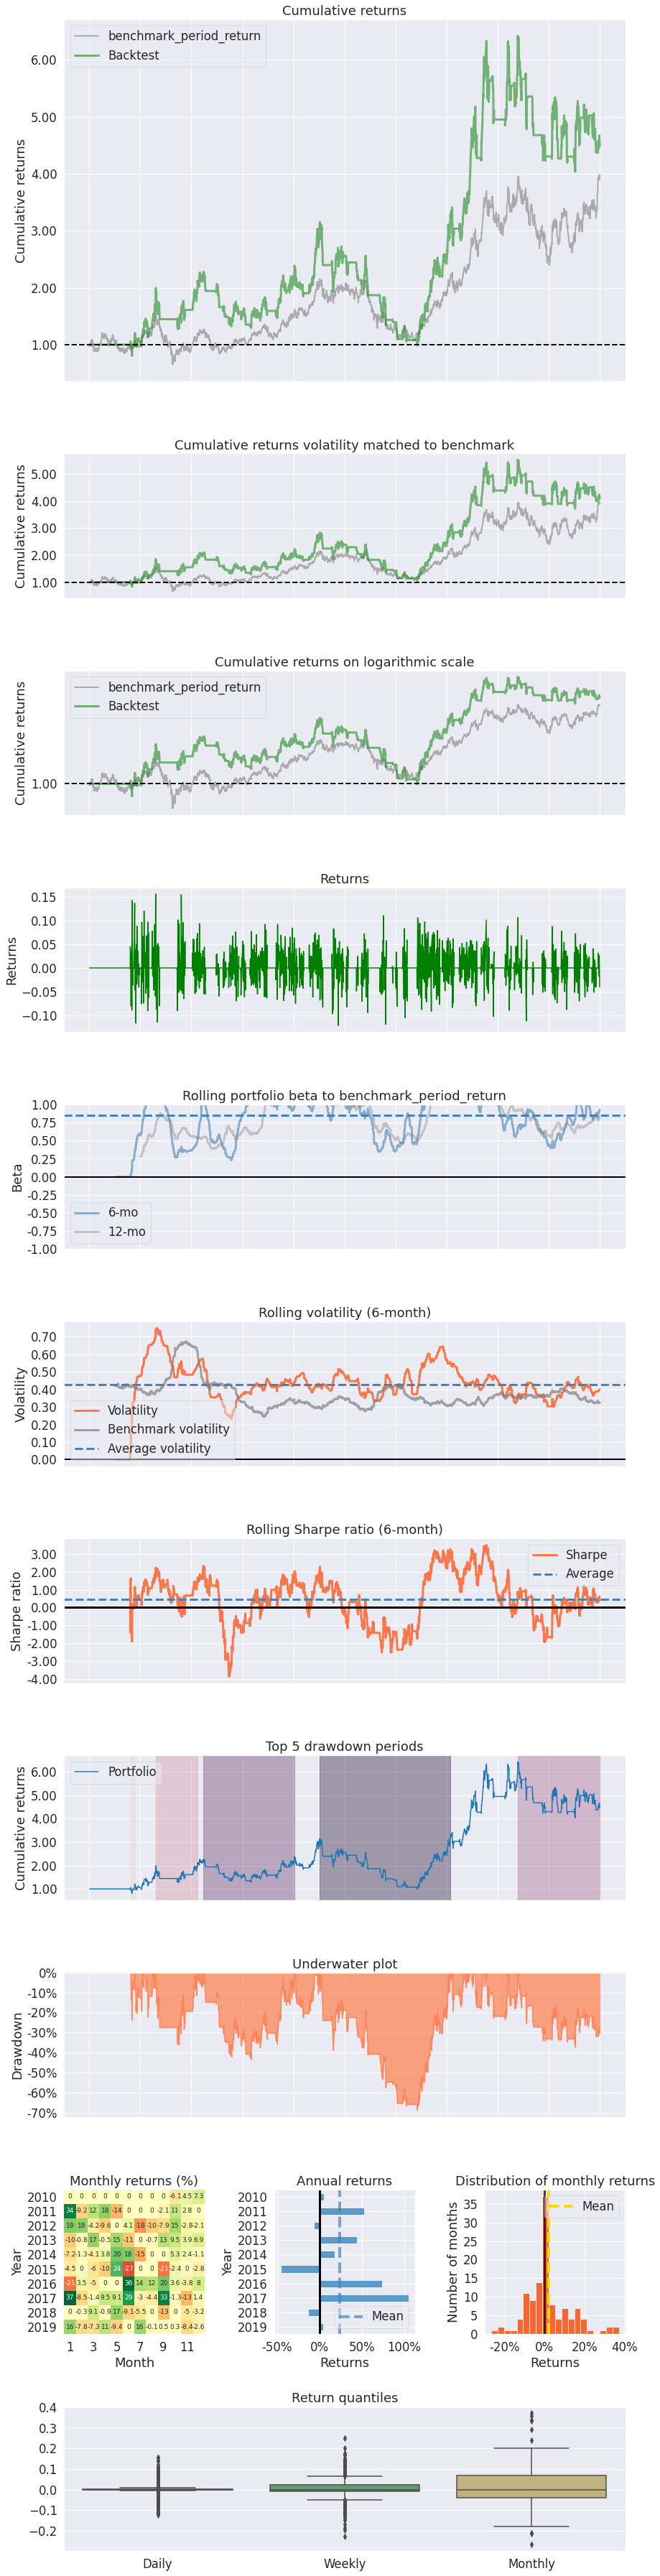

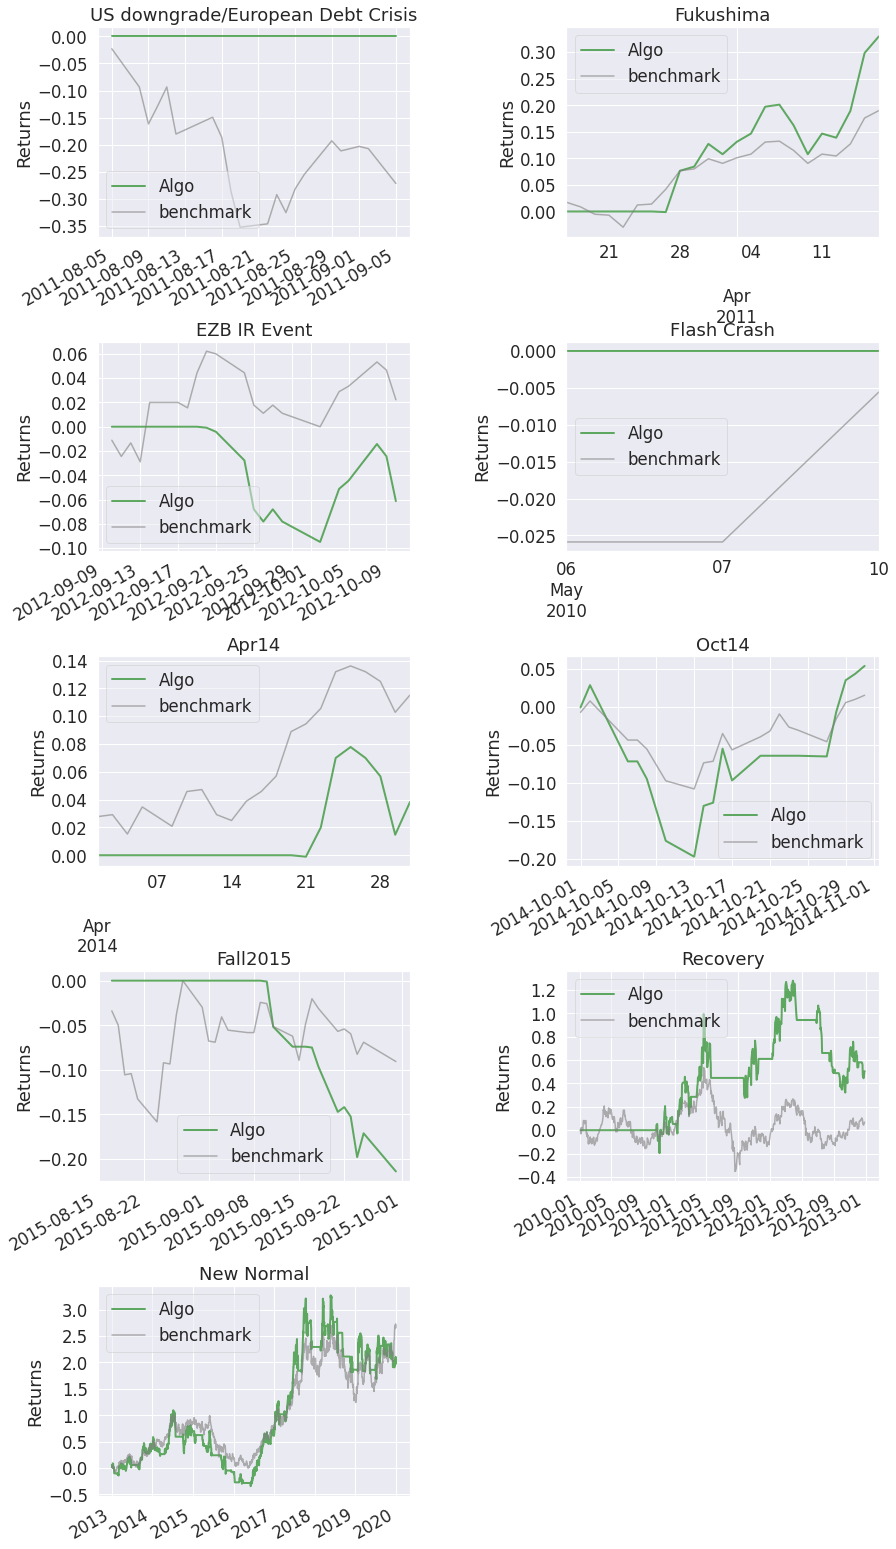

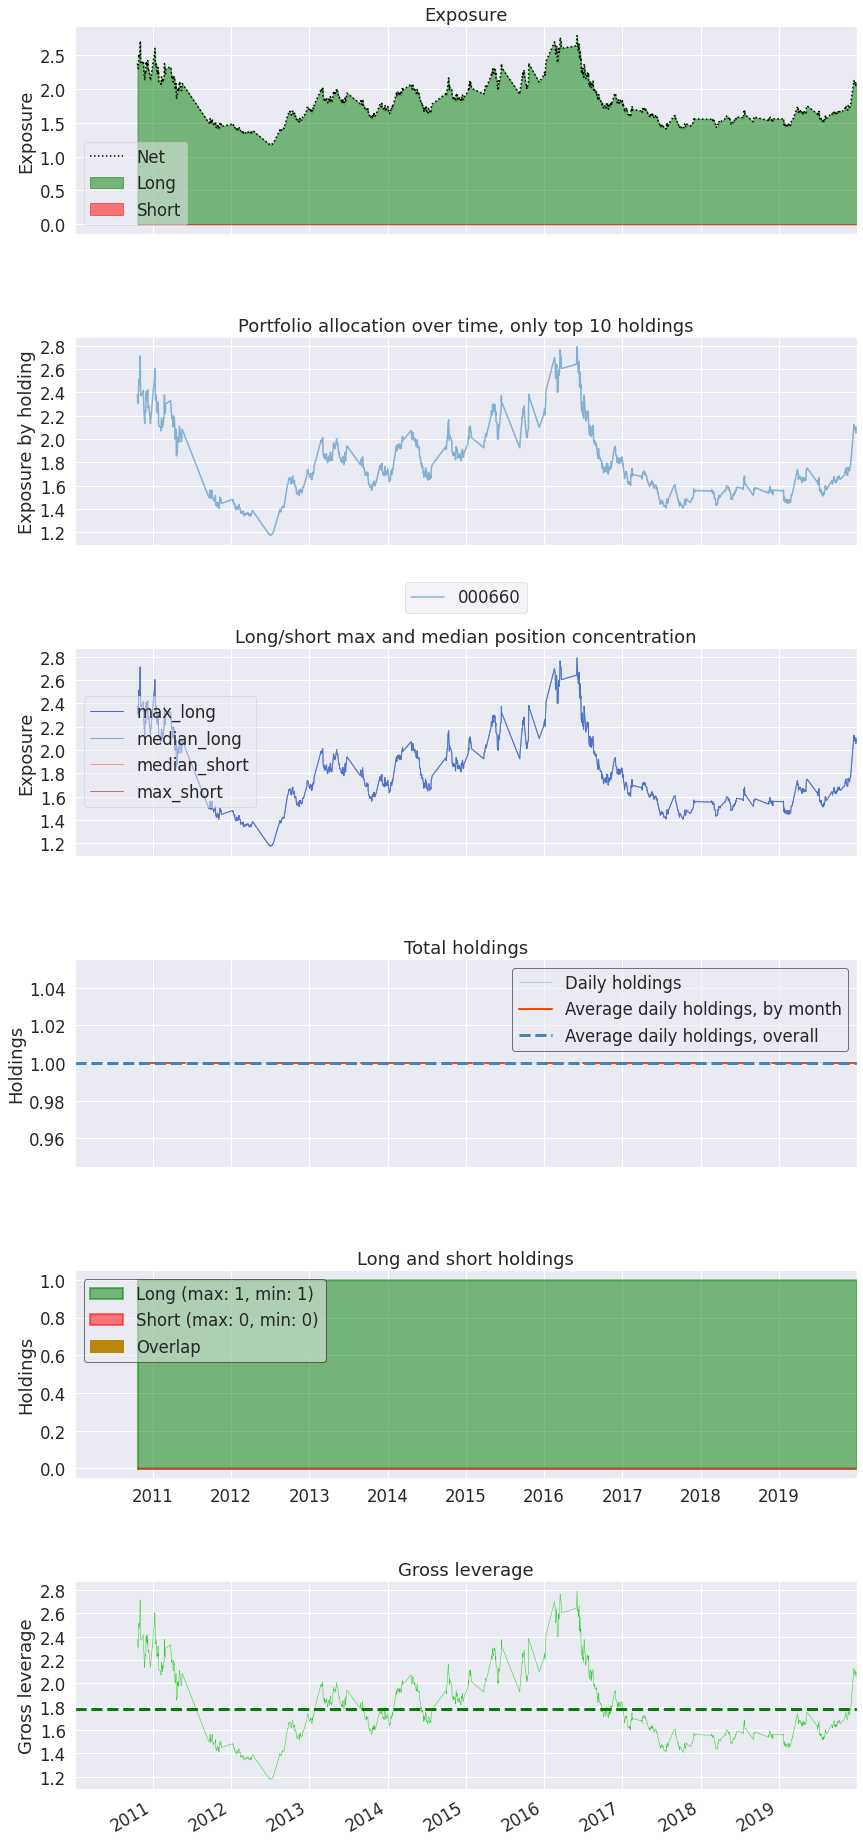

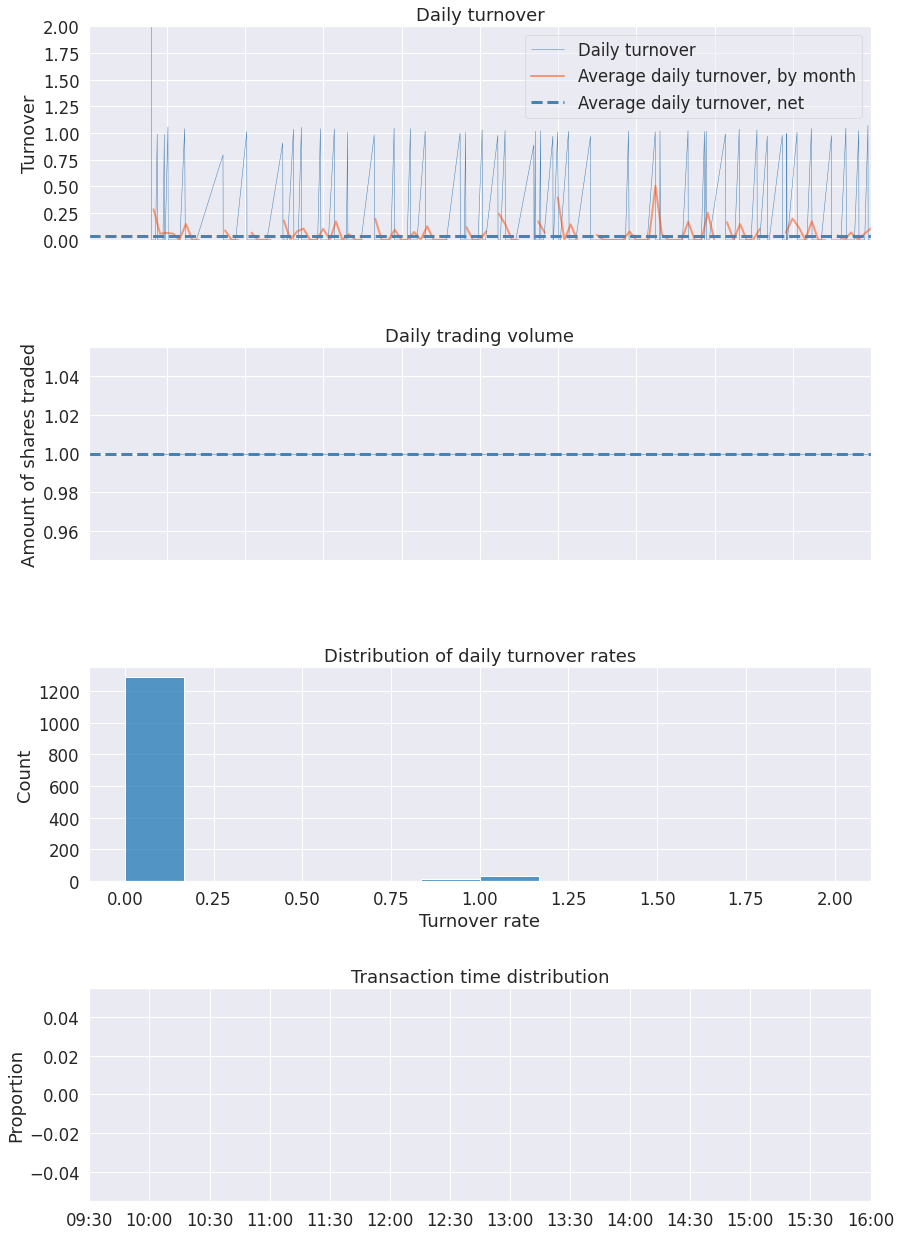

In [26]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns)

In [27]:
perf

,period_open,period_close,short_exposure,longs_count,long_exposure,long_value,ending_cash,gross_leverage,starting_cash,pnl,...,treasury_period_return,trading_days,algo_volatility,period_label,benchmark_period_return,benchmark_volatility,algorithm_period_return,stock,short_mavg,long_mavg
2010-01-04 00:00:00+00:00,2010-01-04 00:01:00+00:00,2010-01-04 06:30:00+00:00,0.0,0,0.0,0.0,10000.000,0.000000,10000.000,0.0,...,0.0,1,NaN,2010-01,0.032120,NaN,0.000000,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,2010-01-05 00:01:00+00:00,2010-01-05 06:30:00+00:00,0.0,0,0.0,0.0,10000.000,0.000000,10000.000,0.0,...,0.0,2,0.000000,2010-01,0.000000,0.709870,0.000000,NaN,NaN,NaN
2010-01-06 00:00:00+00:00,2010-01-06 00:01:00+00:00,2010-01-06 06:30:00+00:00,0.0,0,0.0,0.0,10000.000,0.000000,10000.000,0.0,...,0.0,3,0.000000,2010-01,0.051392,0.685214,0.000000,NaN,NaN,NaN
2010-01-07 00:00:00+00:00,2010-01-07 00:01:00+00:00,2010-01-07 06:30:00+00:00,0.0,0,0.0,0.0,10000.000,0.000000,10000.000,0.0,...,0.0,4,0.000000,2010-01,0.044968,0.589934,0.000000,NaN,NaN,NaN
2010-01-08 00:00:00+00:00,2010-01-08 00:01:00+00:00,2010-01-08 06:30:00+00:00,0.0,0,0.0,0.0,10000.000,0.000000,10000.000,0.0,...,0.0,5,0.000000,2010-01,0.055675,0.510985,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,2019-12-23 00:01:00+00:00,2019-12-23 06:30:00+00:00,0.0,1,94600.0,94600.0,-49277.955,2.087284,-49277.955,-400.0,...,0.0,2462,0.435894,2019-12,3.051392,0.379575,3.532205,94600.0,89020.0,84296.666667
2019-12-24 00:00:00+00:00,2019-12-24 00:01:00+00:00,2019-12-24 06:30:00+00:00,0.0,1,93800.0,93800.0,-49277.955,2.106821,-49277.955,-800.0,...,0.0,2463,0.435846,2019-12,3.017131,0.379510,3.452205,93800.0,90330.0,84650.000000
2019-12-26 00:00:00+00:00,2019-12-26 00:01:00+00:00,2019-12-26 06:30:00+00:00,0.0,1,94800.0,94800.0,-49277.955,2.082507,-49277.955,1000.0,...,0.0,2464,0.435812,2019-12,3.059957,0.379446,3.552205,94800.0,91750.0,85030.000000
2019-12-27 00:00:00+00:00,2019-12-27 00:01:00+00:00,2019-12-27 06:30:00+00:00,0.0,1,96000.0,96000.0,-49277.955,2.054705,-49277.955,1200.0,...,0.0,2465,0.435799,2019-12,3.111349,0.379387,3.672205,96000.0,93010.0,85450.000000
